In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
# Read in the data
website = pd.read_csv(r'C:\Users\shimtek\Projetos\Codecademy\Data Science\website.csv')

In [5]:
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


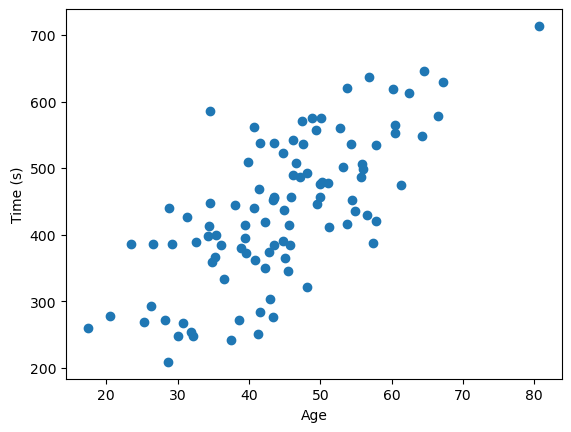

<Figure size 640x480 with 0 Axes>

In [18]:
# Create a scatter plot of time vs age
plt.scatter(website.age, website.time_seconds)
plt.xlabel('Age')
plt.ylabel('Time (s)')

# Show then clear plot
plt.show()
plt.clf()

In [20]:
# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', website)
results = model.fit()
print(results.params)

Intercept    128.967945
age            6.913758
dtype: float64


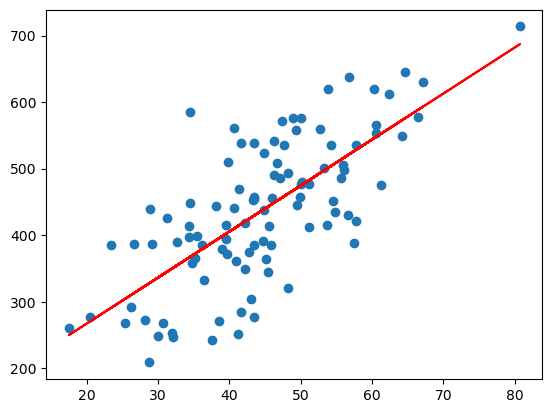

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot the scatter plot with the line on top
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, results.params[0] + results.params[1]*website.age, 'r')

# Show then clear plot
plt.show()
plt.clf()

In [10]:
# Calculate fitted values
fitted_values = results.predict(website)

In [11]:
# Calculate residuals
residuals = website.time_seconds - fitted_values

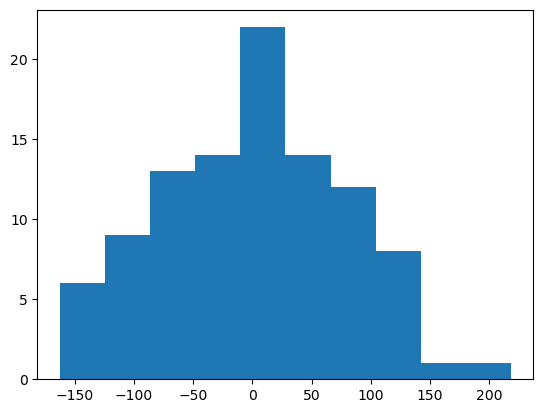

<Figure size 640x480 with 0 Axes>

In [12]:
# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# These residuals appear normally distributed (below), leading us to conclude that the normality assumption is satisfied.
# If the plot was skewed right, we would be concerned that the normality assumption is not met.

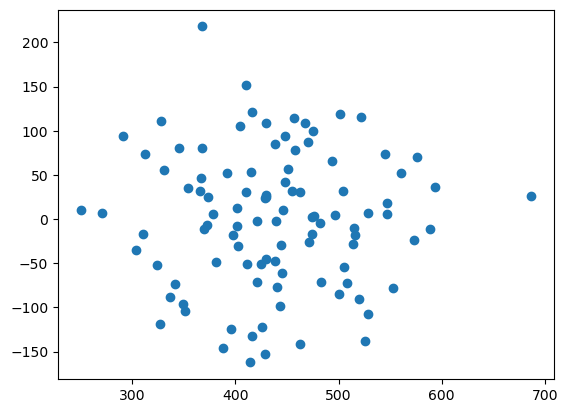

<Figure size 640x480 with 0 Axes>

In [13]:
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()

# If the homoscedasticity assumption is met, then this plot will look like a random splatter of points, centered around y=0 (as below).
# If there are any patterns or asymmetry, that would indicate the assumption is NOT met and linear regression may not be appropriate.

In [14]:
# Predict amount of time on website for 40 year old
pred40 = results.params[0] + results.params[1]*40
print('predicted time on website for a 40 year old: ', pred40)

predicted time on website for a 40 year old:  405.5182489324497


In [15]:
# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ browser', website)
results = model.fit()
print(results.params)

Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64


In [16]:
# Calculate and print the group means (for comparison)
mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print('Mean time (Chrome): ', mean_time_chrome)
print('Mean time (Safari): ', mean_time_safari)
print('Mean time difference: ', mean_time_chrome - mean_time_safari)

Mean time (Chrome):  489.70425531914907
Mean time (Safari):  390.64716981132074
Mean time difference:  99.05708550782833
